# Projeto Trainee CV - 2020

# Parte 1 - Manipulação

## Bibliotecas

In [1]:
import numpy as np

import cv2
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import os
import pandas as pd

import sklearn
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

## Tarefa 1.1

Crie uma função que recebe o endereço de uma imagem e retorna sua visualização de três formas diferentes: com OpenCV, com Pillow e com Matplotlib.

In [2]:
def visualiza(path, modo, cmap = None):
    """
    Recebe o endereço de uma imagem e o modo e retorna a exibição da imagem na tela

    Modos: [1] OpenCV; [2] Pillow; [3] Matplotlib

    ...
    Argumentos:
        path: endereço da imagem
        cmap: cmap utilizado na exibição com Matplotlib (padrão = None)

    """
    if modo == 1:
        img = cv2.imread(path)
        cv2.imshow('Visualizacao com OpenCV', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    elif modo == 2:
        img = Image.open(path)
        img.show(title = 'Visualizacao com Pillow')
        
    else:
        img = mpimg.imread(path)
        fig = plt.figure()
        fig.canvas.set_window_title('Visualizacao com Matplotlib')
        plt.imshow(img, cmap = plt.get_cmap(cmap))
        plt.axis('off')
        plt.show()

## Tarefa 1.2

Crie uma função que converte uma imagem colorida em uma imagem preto e branco usando numpy.

In [4]:
def escalaCinza(path, visualiza):
    """
    Recebe o endereço de uma imagem colorida e retorna sua conversão em escalas de cinza
    ...
    Argumentos:
        path: endereço da imagem
        visualiza: bool para exibição da imagem na tela
    Saídas:
        imgCinza: imagem convertida em escalas de cinza
    """
    img = cv2.imread(path)
    # Conversão de BGR (padrão do OpenCV) para escalas de cinza
    imgCinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if visualiza == True:
        fig = plt.figure()
        fig.canvas.set_window_title('Conversao em Escalas de Cinza')
        plt.imshow(imgCinza, cmap = plt.get_cmap('gray'))
        plt.axis('off')
        plt.show()

    return imgCinza

## Tarefa 1.3

Crie duas funções que realizem processos de *augmentation* usando numpy.

### Flip

In [5]:
def flip(img, h = True, v = False, visualiza = False):
    """
    Inverte a imagem de entrada na horizontal e/ou na vertical
    ...
    Argumentos:
        img: imagem no formato de matriz (np.array)
        h: booleana para inversão da imagem na horizontal (padrão = True)
        v: booleana para inversão da imagem na vertical (padrão = False)
        visualiza: booleana para exibição da imagem na tela com OpenCV (padrão = False))
    Saídas:
        img: imagem alterada no formato de matriz (np.array)
    """ 
    imgAux = img.copy()
    if h == True:
        for j in range(img.shape[1]):
            imgAux[:,j,:] = img[:,-j-1,:]

    img = imgAux.copy()
    if v == True:
        for i in range(img.shape[0]):
            img[i,:,:] = imgAux[-i-1,:,:]

    if visualiza == True:
        cv2.imshow(f'Flip: h = {h}, v = {v}', img)
        cv2.waitKey(0)

    return img

O mesmo resultado pode ser obtido utilizando a biblioteca imgaug: <br>
&emsp;import imgaug.augmenters.flip as flip<br>
&emsp;flipHorizontal = flip.fliplr(imagem)<br>
&emsp;flipVertical = flip.flipud(imagem)<br>

### Brilho 

In [6]:
def brilho(img, brilho = np.random.randint(50, 151), sinal = np.random.randint(0, 2) - 0.5, visualiza = False):
    """
    Altera o brilho da imagem de entrada
    ...
    Argumentos:
        img: imagem no formato de matriz de uint8 entre 0 e 255, padrão do OpenCV
        brilho: brilho a ser somado ou subtraído na imagem (padrão = inteiro aleatório entre 50 e 151)
        sinal: define se o brilho será somado [1] ou subtraído [-1] (padrão = 1 ou -1, aleatoriamente)
        visualiza: booleana para exibição da imagem na tela com OpenCV (padrão = False))
    Saídas:
        img: imagem alterada no formato de matriz de uint8 entre 0 e 255, padrão do OpenCV
    """
    img = img.astype('int32')
    sinal = sinal/np.abs(sinal)
    img = np.clip(img + sinal*brilho, 0, 255).astype('uint8')

    if visualiza == True:
        cv2.imshow(f'brilho = {sinal*brilho}', img)
        cv2.waitKey(0)

    return img

O mesmo resultado pode ser obtido utilizando tensorflow:<br>
&emsp;import tensorflow as tf<br>
&emsp;brilho = tf.image.adjust_brightness(imagem, delta = sinal*brilho)<br>
Sendo delta um float entre 0 e 1.

## Tarefa 1.4

Aplique os filtros *blur*, *gaussian blur* e *median blur* em uma imagem.

In [7]:
def compara(original, alterada, subtitulo = 'Alterada'):
    """
    Recebe duas imagens e mostra na tela uma ao lado da outra
    ...
    Argumentos:
        original: imagem 1
        alterada: imagem 2
        subtitulo: título da imagem 2 (padrão = 'Alterada')
    """
    fig, ax = plt.subplots(1, 2, figsize = (10,10))
    ax[0].imshow(img)
    ax[0].set_title('Original')
    ax[0].axis('off')
        
    ax[1].imshow(alterada)
    ax[1].set_title(subtitulo)
    ax[1].axis('off')

    plt.tight_layout()
    
    plt.axis('off')
    plt.show()

In [8]:
path = 'teste.png'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### *Blur*

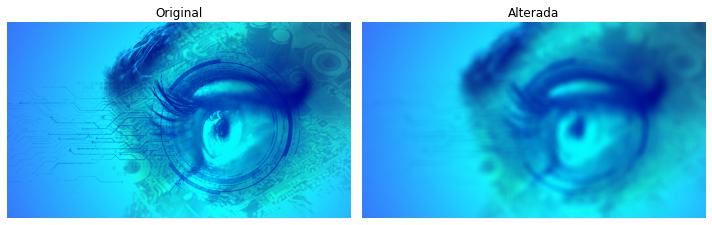

In [9]:
#n positivo
n = 21
blur = cv2.blur(img, (n, n))
compara(img, blur)

### *Gaussian Blur*

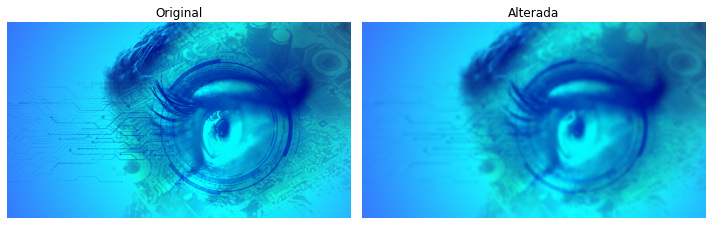

In [10]:
#n ímpar e positivo
n = 21
gBlur = cv2.GaussianBlur(img, (n, n), 0)
compara(img, gBlur)

### *Median Blur*

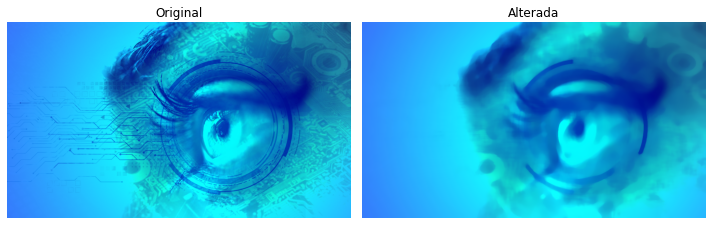

In [11]:
#n ímpar e positivo
n = 21
mBlur = cv2.medianBlur(img, n)
compara(img, mBlur)

# Parte 2 - Classificação

## Tarefa 2.1

Dividir imagens entre os grupos de treino, validação e teste com particionamento arbitrário.

In [12]:
def getImgLabels(path):
    """
    Recebe um diretório (root folder) com pastas (sub-folders) contendo imagens de cada classe (total de n classes).
    Retorna uma lista de n listas cujos elementos são as imagens de sua respectiva classe e uma lista destas classes.
    ...
    Argumentos:
        path: path do diretório (root folder)
    Saídas:
        imagens: lista de listas contendo as imagens
        classes: lista de classes ordenadas de acordo com a saída imagens
    """
    classes = sorted(os.walk(path).__next__()[1])
    numClasses = len(classes)
    imagens = list()

    for classe in classes:
        imgClasse = list()
        dirClasse = os.path.join(path, classe)
        amostras = os.walk(dirClasse).__next__()[2]
        for amostra in amostras:
            imgClasse.append(amostra)
        imagens.append(imgClasse)
        
    return imagens, classes

In [13]:
def splitDataset(lista, pctTreino = 0.7, pctValida = 0.2, seed = 42):
    """
    Recebe uma lista de listas amostras e as separa em 3 grupos: treino, validação e teste.
    O tamanho de cada grupo é arbitrariamente escolhido e as amostras são divididas randomicamente.
    ...
    Argumentos:
        lista: lista de listas contendo amostras
        pctTreino: fração do dataset utilizada para treinamento (padrão = 0.7)
        pctValida: fração do dataset utilizada para validação (padrão = 0.2)
        seed: semente para o processo de randomização
    Saídas:
        treino: lista de amostras utilizadas para treinamento
        valida: lista de amostras utilizadas para validação
        teste: lista de amostras utilizadas para teste
    """
    np.random.seed(seed)
    
    treino = list()
    valida = list()
    teste = list()
    for amostras in lista:
        np.random.shuffle(amostras)
        num = len(amostras)
        numTreino = int(np.round(num*pctTreino))
        numValida = int(np.round(num*pctValida))
        treino.append(amostras[0:numTreino])
        valida.append(amostras[numTreino:numTreino + numValida])
        teste.append(amostras[numTreino + numValida:])
    
    return treino, valida, teste

In [14]:
def criaPastas(treino, valida, teste, classes, pathSrc):
    """
    Recebe listas de treino, validação e teste separadas com listas de cada classe, as classes e o path original.
    Cria três pastas para cada grupo e, dentro delas, uma pasta para cada classe. Retorna o path destes diretórios.
    ...
    Argumentos:
        treino: lista de listas contendo amostras utilizadas para treinamento
        valida: lista de listas contendo amostras utilizadas para validação
        teste: lista de listas contendo amostras utilizadas para teste
        classes: lista contendo o nome de cada classe, ordenada de acordo com as listas dos grupos
        pathSrc: path original das amostras contidas nas listas dos grupos
    Saídas:
        dirDst: lista de listas contendo o path dos três diretórios criados
    """
    grupos = ['treino', 'validacao', 'teste']
    dirSrc = [os.path.join(pathSrc, classe) for classe in classes]
    dirDst = [[os.path.join(pathSrc, grupo, classe) for classe in classes] for grupo in grupos]
    
    #Criar diretórios
    for grupo in range(len(grupos)):
        for pasta in dirDst[grupo]:
            try:
                os.makedirs(pasta)
            except FileExistsError:
                print(f'O diretório {pasta} já existe')
            
    #Mover imagens para os diretórios de treino
    for classe in range(len(treino)):
        for amostra in treino[classe]:
            os.rename(os.path.join(dirSrc[classe], amostra), os.path.join(dirDst[0][classe], amostra))
    
    #Mover imagens para os diretórios de validação
    for classe in range(len(valida)):
        for amostra in valida[classe]:
            os.rename(os.path.join(dirSrc[classe], amostra), os.path.join(dirDst[1][classe], amostra))
    
    #Mover imagens para os diretórios de teste
    for classe in range(len(teste)):
        for amostra in teste[classe]:
            os.rename(os.path.join(dirSrc[classe], amostra), os.path.join(dirDst[2][classe], amostra))
            
    #Deletar diretórios originais, agora vazios
    for pasta in dirSrc:
        try:
            os.rmdir(pasta)
        except FileNotFoundError or OSError:
            print(f'O diretório {pasta} não existe')
    
    return [os.path.join(pathSrc, grupo) for grupo in grupos]

In [70]:
#Path da pasta contendo as imagens, separada em classes
path = 'Dataset_Trainee'
imagens, classes = getImgLabels(path)
treino, valida, teste = splitDataset(imagens)
diretorios = criaPastas(treino, valida, teste, classes, path)

OSError: [Errno 39] Directory not empty: 'Dataset_Trainee/teste'

## Tarefa 2.2

Transformar imagens em tensor.

In [16]:
totalTreino = sum([len(t) for t in treino])
totalValida = sum([len(v) for v in valida])
totalTeste = sum([len(t) for t in teste])

batchSize = 100
epochs = 15
altura = 150
largura = 150

In [17]:
imgGenTreino = ImageDataGenerator(rescale = 1./255)
imgGenValida = ImageDataGenerator(rescale = 1./255)
imgGenTeste = ImageDataGenerator(rescale = 1./255)

In [18]:
dataGenTreino = imgGenTreino.flow_from_directory(batch_size = batchSize, directory = diretorios[0], 
                                                 shuffle = True, target_size = (altura, largura),
                                                 class_mode = 'categorical')

Found 1279 images belonging to 3 classes.


In [19]:
dataGenValida = imgGenValida.flow_from_directory(batch_size = batchSize, directory = diretorios[1], 
                                                 target_size = (altura, largura),
                                                 class_mode = 'categorical')

Found 366 images belonging to 3 classes.


In [20]:
dataGenTeste = imgGenTeste.flow_from_directory(directory = diretorios[2], 
                                               target_size = (altura, largura),
                                               class_mode = 'categorical')

Found 182 images belonging to 3 classes.


## Tarefa 2.3

Treinar uma regressão logística para classificar as imagens.

### Preparação dos dados

In [21]:
dirsTreino = [os.path.join(diretorios[0], classe) for classe in sorted(os.listdir(diretorios[0]))]
dirsValida = [os.path.join(diretorios[1], classe) for classe in sorted(os.listdir(diretorios[1]))]
dirsTeste = [os.path.join(diretorios[2], classe) for classe in sorted(os.listdir(diretorios[2]))]

In [22]:
imgsPorClasseTreino = [[os.path.join(pathClasse, img) for img in os.listdir(pathClasse)] for pathClasse in dirsTreino] 
imgsPorClasseValida = [[os.path.join(pathClasse, img) for img in os.listdir(pathClasse)] for pathClasse in dirsValida] 
imgsPorClasseTeste = [[os.path.join(pathClasse, img) for img in os.listdir(pathClasse)] for pathClasse in dirsTeste] 

In [23]:
xTreino = []
yTreino = []
for label, classe in enumerate(imgsPorClasseTreino):
    for pathImg in classe:
        img = cv2.imread(pathImg, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (altura, largura))
        xTreino.append(img)
        yTreino.append(label)

#TESTE: validação + teste
xTeste = []
yTeste = []
for label, classe in enumerate(imgsPorClasseValida):
    for pathImg in classe:
        img = cv2.imread(pathImg, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (altura, largura))
        xTeste.append(np.array(img))
        yTeste.append(label)

for label, classe in enumerate(imgsPorClasseTeste):
    for pathImg in classe:
        img = cv2.imread(pathImg, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (altura, largura))
        xTeste.append(np.array(img))
        yTeste.append(label)

In [24]:
xTreino = np.array(xTreino)
xTreinoFlat = xTreino.reshape(xTreino.shape[0], xTreino.shape[1]*xTreino.shape[2])
xTreino = xTreinoFlat
xTreino = sklearn.preprocessing.scale(xTreino)

xTeste = np.array(xTeste)
xTesteFlat = xTeste.reshape(xTeste.shape[0], xTeste.shape[1]*xTeste.shape[2])
xTeste = xTesteFlat
xTeste = sklearn.preprocessing.scale(xTeste)

###  Regressão logística

In [25]:
LR = LogisticRegression()
LR.fit(xTreino, yTreino)

/home/rafaelcoelho/Poli/Turing/CV/ProjetoTrainee/venv_cv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

Por se tratar de um modelo simples aplicado em um problema complexo, não há convergência.

In [26]:
LR.score(xTeste, yTeste)

0.6040145985401459

Ainda assim, apresenta uma acurácia aceitável.

## Tarefa 2.4

Treinar uma CNN para classificar as imagens.

### Modelo

In [40]:
modelo = Sequential([
    Conv2D(32, 3, padding='same', activation = 'relu', input_shape=(altura, largura, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3)
])

In [41]:
modelo.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
               metrics = ['accuracy'])

In [42]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

### Treinamento

In [43]:
hist = modelo.fit(
    dataGenTreino,
    epochs = epochs,
    validation_data = dataGenValida
)

Epoch 1/15
13/13 [==============================] - 20s 2s/step - loss: 1.7368 - accuracy: 0.4081 - val_loss: 0.6337 - val_accuracy: 0.5601
Epoch 2/15
13/13 [==============================] - 22s 2s/step - loss: 0.5671 - accuracy: 0.5864 - val_loss: 0.5188 - val_accuracy: 0.6202
Epoch 3/15
13/13 [==============================] - 22s 2s/step - loss: 0.4116 - accuracy: 0.7576 - val_loss: 0.4246 - val_accuracy: 0.7404
Epoch 4/15
13/13 [==============================] - 21s 2s/step - loss: 0.3006 - accuracy: 0.8327 - val_loss: 0.4060 - val_accuracy: 0.7268
Epoch 5/15
13/13 [==============================] - 21s 2s/step - loss: 0.2257 - accuracy: 0.8866 - val_loss: 0.3745 - val_accuracy: 0.7705
Epoch 6/15
13/13 [==============================] - 21s 2s/step - loss: 0.1642 - accuracy: 0.9242 - val_loss: 0.4285 - val_accuracy: 0.7350
Epoch 7/15
13/13 [==============================] - 21s 2s/step - loss: 0.1239 - accuracy: 0.9547 - val_loss: 0.4648 - val_accuracy: 0.7240
Epoch 8/15
13/13 [==

### Avaliação

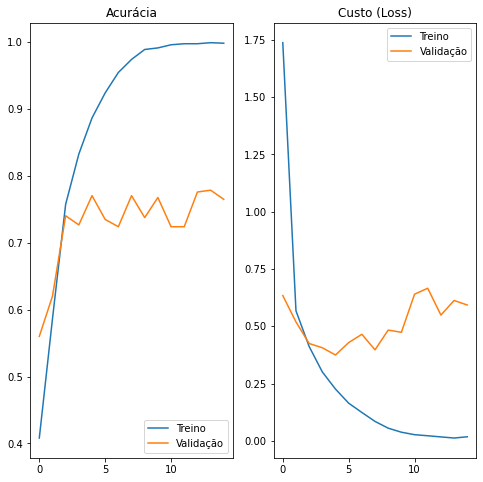

In [44]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Treino')
plt.plot(epochs_range, val_acc, label = 'Validação')
plt.legend(loc = 'lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Treino')
plt.plot(epochs_range, val_loss, label = 'Validação')
plt.legend(loc = 'upper right')
plt.title('Custo (Loss)')
plt.show()

A diferença entre as curvas de treino e validação indica overfitting. O que já era esperado, visto que há poucas imagens para aprendizado.

In [45]:
modelo.evaluate(dataGenTeste, return_dict = True)

6/6 [==============================] - 1s 132ms/step - loss: 0.5494 - accuracy: 0.7692


{'loss': 0.5494208931922913, 'accuracy': 0.7692307829856873}

A acurácia obtida é 76,92%, aceitável para este modelo com poucas imagens.

## Tarefa 2.5 

Treinar uma CNN para classificar as imagens com data augmentation e duas funções de ativação.

### Augmentation

In [46]:
imgGenAugTreino = ImageDataGenerator(rescale=1./255,
                                     rotation_range = 45,
                                     width_shift_range = .15,
                                     height_shift_range = .15,
                                     horizontal_flip = True,
                                     zoom_range = 0.5)

dataGenAugTreino = imgGenAugTreino.flow_from_directory(batch_size = batchSize, directory = diretorios[0], 
                                                 shuffle = True, target_size = (altura, largura),
                                                 class_mode = 'categorical')

Found 1279 images belonging to 3 classes.


###  Modelo 1: ReLU

In [53]:
modelo1 = Sequential([
    Conv2D(32, 3, padding='same', activation = 'relu', input_shape=(altura, largura, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3)
])

In [54]:
modelo1.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
               metrics = ['accuracy'])

In [55]:
modelo1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

### Treinamento 

In [56]:
hist1 = modelo1.fit(
    dataGenAugTreino,
    epochs = epochs,
    validation_data = dataGenValida
)

Epoch 1/15
13/13 [==============================] - 22s 2s/step - loss: 0.7731 - accuracy: 0.3636 - val_loss: 0.6274 - val_accuracy: 0.3689
Epoch 2/15
13/13 [==============================] - 21s 2s/step - loss: 0.6007 - accuracy: 0.4652 - val_loss: 0.6120 - val_accuracy: 0.5109
Epoch 3/15
13/13 [==============================] - 22s 2s/step - loss: 0.5070 - accuracy: 0.6130 - val_loss: 0.4767 - val_accuracy: 0.6284
Epoch 4/15
13/13 [==============================] - 24s 2s/step - loss: 0.4593 - accuracy: 0.6622 - val_loss: 0.5530 - val_accuracy: 0.6366
Epoch 5/15
13/13 [==============================] - 22s 2s/step - loss: 0.4284 - accuracy: 0.7091 - val_loss: 0.4437 - val_accuracy: 0.6940
Epoch 6/15
13/13 [==============================] - 22s 2s/step - loss: 0.4085 - accuracy: 0.7326 - val_loss: 0.4299 - val_accuracy: 0.7022
Epoch 7/15
13/13 [==============================] - 22s 2s/step - loss: 0.3976 - accuracy: 0.7514 - val_loss: 0.4408 - val_accuracy: 0.6940
Epoch 8/15
13/13 [==

### Avaliação 

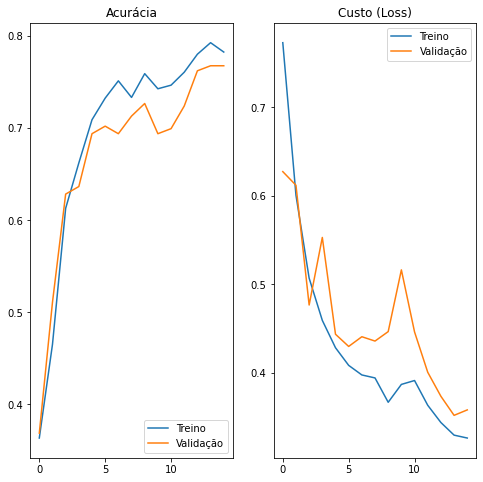

In [57]:
acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Treino')
plt.plot(epochs_range, val_acc, label = 'Validação')
plt.legend(loc = 'lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Treino')
plt.plot(epochs_range, val_loss, label = 'Validação')
plt.legend(loc = 'upper right')
plt.title('Custo (Loss)')
plt.show()

In [58]:
modelo1.evaluate(dataGenTeste, return_dict = True)

6/6 [==============================] - 1s 127ms/step - loss: 0.2973 - accuracy: 0.8132


{'loss': 0.2972814440727234, 'accuracy': 0.8131868243217468}

### Modelo 2: Sigmoid

In [64]:
modelo2 = Sequential([
    Conv2D(32, 3, padding = 'same', activation = 'sigmoid',
           input_shape = (altura, largura, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation = 'sigmoid'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation = 'sigmoid'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation = 'sigmoid'),
    Dense(3)
])

In [65]:
modelo2.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
               metrics = ['accuracy'])

In [66]:
modelo2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20736)            

### Treinamento 

In [67]:
hist2 = modelo2.fit(
    dataGenAugTreino,
    epochs = epochs,
    validation_data = dataGenValida
)

Epoch 1/15
13/13 [==============================] - 21s 2s/step - loss: 1.2479 - accuracy: 0.3659 - val_loss: 1.1552 - val_accuracy: 0.3770
Epoch 2/15
13/13 [==============================] - 25s 2s/step - loss: 1.0750 - accuracy: 0.3776 - val_loss: 0.9908 - val_accuracy: 0.3770
Epoch 3/15
13/13 [==============================] - 22s 2s/step - loss: 0.9370 - accuracy: 0.3862 - val_loss: 0.8733 - val_accuracy: 0.3552
Epoch 4/15
13/13 [==============================] - 22s 2s/step - loss: 0.8176 - accuracy: 0.3550 - val_loss: 0.7594 - val_accuracy: 0.3552
Epoch 5/15
13/13 [==============================] - 22s 2s/step - loss: 0.7147 - accuracy: 0.3589 - val_loss: 0.6699 - val_accuracy: 0.3770
Epoch 6/15
13/13 [==============================] - 22s 2s/step - loss: 0.6464 - accuracy: 0.3776 - val_loss: 0.6333 - val_accuracy: 0.3770
Epoch 7/15
13/13 [==============================] - 22s 2s/step - loss: 0.6330 - accuracy: 0.3776 - val_loss: 0.6328 - val_accuracy: 0.3770
Epoch 8/15
13/13 [==

### Avaliação 

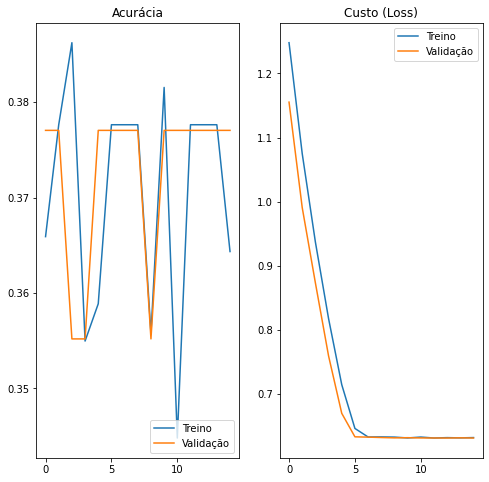

In [68]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']

loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Treino')
plt.plot(epochs_range, val_acc, label = 'Validação')
plt.legend(loc = 'lower right')
plt.title('Acurácia')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Treino')
plt.plot(epochs_range, val_loss, label = 'Validação')
plt.legend(loc = 'upper right')
plt.title('Custo (Loss)')
plt.show()

In [69]:
modelo2.evaluate(dataGenTeste, return_dict = True)

6/6 [==============================] - 1s 184ms/step - loss: 0.6308 - accuracy: 0.3791


{'loss': 0.630840539932251, 'accuracy': 0.3791208863258362}

### Conclusão

O modelo 1, cuja função de ativação das camadas é ReLU, apresenta a melhor acurácia (81,32%) e o menor custo (0,2973) para as amostras de teste. Já o modelo 2, que utiliza Sigmoid, tem uma acurácia muito baixa (37,91%) e um custo mais elevado (0,6308) para o mesmo caso, o que indica que a escolha da função de ativação não foi adequada.<br>
O processo de augmentation e o aumento das camadas mostrou uma melhora de aproximadamente 4% na acurácia em comparação com a tarefa 2.4.